# TP3 - Classification de chiffres 8*8
1. Charger le dataset "digits_train.csv" disponible sur Moodle dans un dataframe. Les chiffres
(8,8) sont encodés en ligne avec 64 valeurs et les labels sont donnés sur la dernière colonne.
2. Quelle est la dimension d pour ce problème ? Combien y a-t-il de classes différentes à prédire
dans ce problème ?
3. Afficher le premier chiffre de la base après un redimensionnement. Pour l’affichage, on pourra
utiliser la fonction imshow du module matplotlib.pyplot avec l’option cmap=gray_r pour
afficher des nuances de gris.

train_data.shape
(1438, 65)


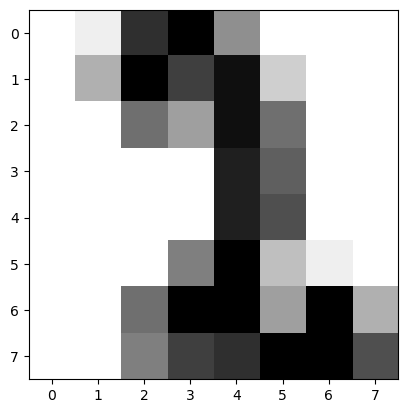

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

train_data = np.loadtxt("digits_train.csv",delimiter=',')
print("train_data.shape")
print(train_data.shape)

#La dimension d est 8*8=64 et il y-a 10 classes à prédire {0,1,2,3,4,5,6,7,8,9}
plt.imshow(np.reshape(train_data[0,:-1],(8,8)),cmap="gray_r")
plt.show()

indices = np.random.permutation(train_data.shape[0])

idx_train, idx_valid = indices[:int(train_data.shape[0]*0.6)], indices[int(train_data.shape[0]*0.6):]
number_train = train_data[idx_train]
number_valid = train_data[idx_valid]
X_train = number_train[:,:-1]
Y_train = number_train[:,-1]
X_valid = number_valid[:,:-1]
Y_valid = number_valid[:,-1]

5. Implémenter l’algorithme des k plus proches voisins pour ce problème.

In [248]:
def euclidian_distance(v1,v2):

    distance = 0
    for i in range(v1.shape[0]):
        distance += (v1[i] - v2[i])**2

    return np.sqrt(distance)

# Fonction qui sélectionne les k plus proches voisins du point x_test dans l'ensemble des points contenus dans X_train.
def neighbors(X_train, y_label, x_test, k):

    list_distances =  []

    ## On calcule toute les distances entre x_test et chaque point de X_train.
    for i in range(X_train.shape[0]):
        distance = euclidian_distance(X_train[i], x_test)
        list_distances.append(distance)

    ## On trie les poinds de X_train par ordre croissant de distance et on renvoie le dataframe qui contient les k plus proches voisins.
    df = pd.DataFrame()
    df["label"] = y_label
    df["distance"] = list_distances
    df = df.sort_values(by="distance")

    return df.iloc[:k,:]

def prediction(neighbors):
    return neighbors["label"].mode()[0]

In [252]:
# Pour le premier point de l'ensemble de validation, affichage de ses 5 plus proches voisins de l'ensemble d'entraînement.
nearest_neighbors = neighbors(X_train, Y_train, X_valid[0], 5)
print(nearest_neighbors)

## Fonction "prediction" qui prend en entrée un dataframe contenant les plus proches voisins d'un point avec leur classe
# (obtenu par la méthode neighbors) et qui renvoie la classe prédite pour ce point.
print(prediction(nearest_neighbors))

     label   distance
295    1.0  10.440307
606    1.0  12.845233
680    1.0  13.000000
560    1.0  13.416408
569    1.0  14.177447
1.0


6. Régler la valeur du paramètre k sur l’ensemble de validation.

In [286]:
def evaluation(X_train, Y_train, X_valid, Y_valid, k, verbose=True):
    TP = 0 
    total = 0
    for i in range(X_valid.shape[0]):
        nearest_neighbors = neighbors(X_train, Y_train, X_valid[i], k)
        if ((prediction(nearest_neighbors) == Y_valid[i])):
            TP += 1
        total += 1
    accuracy = TP/ total
    print("Accuracy:" + str(accuracy))
    return accuracy
evaluation(X_train, Y_train, X_valid, Y_valid, 15)

Accuracy:0.9722222222222222


0.9722222222222222

 11%|█████                                        | 1/9 [00:10<01:22, 10.36s/it]

Accuracy:0.9895833333333334


 22%|██████████                                   | 2/9 [00:20<01:12, 10.31s/it]

Accuracy:0.9826388888888888


 33%|███████████████                              | 3/9 [00:30<01:01, 10.27s/it]

Accuracy:0.9774305555555556


 44%|████████████████████                         | 4/9 [00:41<00:51, 10.27s/it]

Accuracy:0.9774305555555556


 56%|█████████████████████████                    | 5/9 [00:51<00:41, 10.27s/it]

Accuracy:0.9774305555555556


 67%|██████████████████████████████               | 6/9 [01:01<00:30, 10.29s/it]

Accuracy:0.9739583333333334


 78%|███████████████████████████████████          | 7/9 [01:12<00:20, 10.40s/it]

Accuracy:0.9774305555555556


 89%|████████████████████████████████████████     | 8/9 [01:22<00:10, 10.37s/it]

Accuracy:0.9722222222222222


100%|█████████████████████████████████████████████| 9/9 [01:33<00:00, 10.34s/it]

Accuracy:0.9704861111111112
[0.9895833333333334, 0.9826388888888888, 0.9774305555555556, 0.9774305555555556, 0.9774305555555556, 0.9739583333333334, 0.9774305555555556, 0.9722222222222222, 0.9704861111111112]



/tmp/ipykernel_3384/2829133687.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


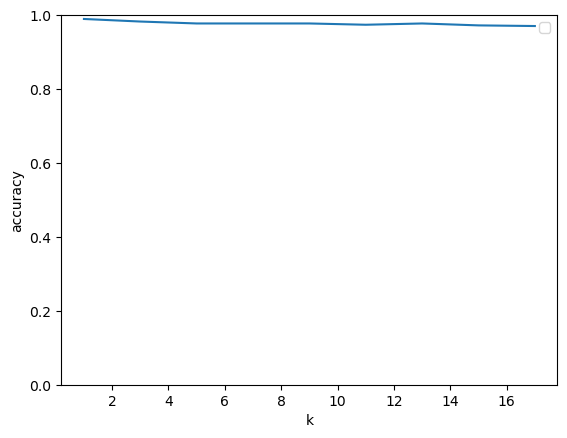

In [290]:
list_accuracy = []

for k in tqdm(range(1,19,2)):
    list_accuracy.append(evaluation(X_train, Y_train, X_valid, Y_valid, k, verbose=False))

print(list_accuracy)

x=range(1,19,2)
y=list_accuracy

plt.plot(x,y)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [300]:
test_data = np.loadtxt("digits_entries_test.csv",delimiter=',')
target_data = np.loadtxt("digits_target_test.csv",delimiter=',')
print(test_data.shape)
print(target_data.shape)

(359, 64)
(359,)
